<a href="https://colab.research.google.com/github/FerdousJUST/Fish-Classification-model-in-cnn-2022__final-/blob/main/Image_Classification_model(final_level).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

import os
import seaborn as sns

In [2]:
print(os.listdir("/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/"))

['Validation', '.ipynb_checkpoints', 'Training', 'valid_test_data', 'Validation_Fish', 'Training1 ', 'Training New', 'Validation New']


In [3]:
SIZE = 128

In [11]:
train_images = []
train_labels = [] 
for directory_path in glob.glob("/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/Spotted_Snakehead_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/Hilsha_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/Barbel_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/Tilapia_Fish


In [5]:
train_images.shape

(4800, 128, 128, 3)

In [6]:
train_labels.shape

(4800,)

In [7]:
test_images = []
test_labels = [] 
for directory_path in glob.glob("/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/*"):
    fruit_label = directory_path.split("\\")[-1]
    print(fruit_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Tilapia_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Spotted_Snakehead_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Barbel_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Hilsha_Fish


In [8]:
test_images.shape

(1200, 128, 128, 3)

In [9]:
test_labels.shape

(1200,)

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [12]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [13]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [14]:
x_train.shape

(4800, 128, 128, 3)

In [15]:
x_test.shape

(1200, 128, 128, 3)

In [16]:
y_train.shape

(4800,)

In [17]:
y_test.shape

(1200,)

In [18]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [19]:
y_train_one_hot.shape

(4800, 4)

In [20]:
y_test_one_hot.shape

(1200, 4)

In [21]:
activation = 'softmax'

feature_extractor = Sequential()


feature_extractor.add(Conv2D(16,padding='same', strides=(1, 1),dilation_rate=(1, 1),kernel_size=(3,3),
                             activation = 'relu',input_shape = (128,128,3)))
feature_extractor.add(MaxPooling2D(2,2))


feature_extractor.add(Conv2D(32,padding='same', strides=(1, 1),dilation_rate=(1, 1),kernel_size=(3,3),
                             kernel_initializer = 'he_uniform',activation = 'relu'))
feature_extractor.add(MaxPooling2D(2,2))


feature_extractor.add(Conv2D(64,padding='same', strides=(1, 1),dilation_rate=(1, 1),kernel_size=(3,3),
                             kernel_initializer = 'he_uniform',activation = 'relu'))
feature_extractor.add(MaxPooling2D(2,2))

feature_extractor.add(Conv2D(128,padding='same', strides=(1, 1),dilation_rate=(1, 1),kernel_size=(3,3),
                             kernel_initializer = 'he_uniform',activation = 'relu'))
feature_extractor.add(MaxPooling2D(2,2))

feature_extractor.add(Conv2D(256,padding='same', strides=(1, 1),dilation_rate=(1, 1),kernel_size=(3,3),
                             kernel_initializer = 'he_uniform',activation = 'relu'))
feature_extractor.add(MaxPooling2D(2,2))
feature_extractor.add(BatchNormalization())
feature_extractor.add(MaxPooling2D(2,2))

feature_extractor.add(Flatten())

In [22]:
x = feature_extractor.output  
x = Dense(512, activation = 'relu', kernel_initializer = 'he_uniform')(x)
prediction_layer = Dense(4, activation = 'softmax')(x)

In [23]:
cnn_model = Model(inputs=feature_extractor.input, outputs=prediction_layer)

In [24]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
cnn_model.compile(loss = 'categorical_crossentropy',              
              optimizer = opt,
              metrics = ['accuracy'])

In [25]:
print(cnn_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496 

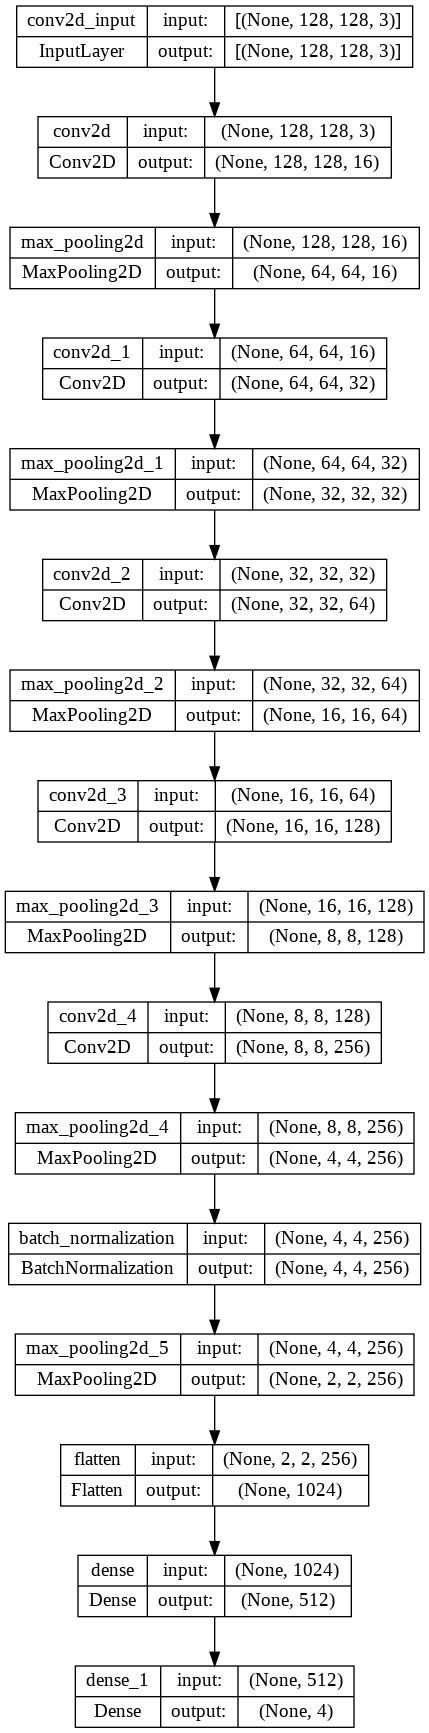

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model = cnn_model,show_shapes = True)

In [27]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import h5py

In [30]:
erl_stop = EarlyStopping(monitor = 'val_loss',patience = 5,restore_best_weights=True)
mod_chk = ModelCheckpoint(
    filepath='/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part fifteen/model_final_level.hdf5',
                          monitor = 'val_loss',save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience = 5,factor = 0.1)

In [31]:
history = cnn_model.fit(x_train, y_train_one_hot, epochs=20,shuffle = True,callbacks = [erl_stop,mod_chk,lr_rate],
                           verbose = 2, validation_data = (x_test, y_test_one_hot))

Epoch 1/20
150/150 - 103s - loss: 0.1167 - accuracy: 0.9667 - val_loss: 0.2315 - val_accuracy: 0.9050 - lr: 1.0000e-05 - 103s/epoch - 689ms/step
Epoch 2/20
150/150 - 100s - loss: 0.1021 - accuracy: 0.9715 - val_loss: 0.2453 - val_accuracy: 0.8942 - lr: 1.0000e-05 - 100s/epoch - 664ms/step
Epoch 3/20
150/150 - 102s - loss: 0.0944 - accuracy: 0.9735 - val_loss: 0.1464 - val_accuracy: 0.9583 - lr: 1.0000e-05 - 102s/epoch - 678ms/step
Epoch 4/20
150/150 - 101s - loss: 0.0878 - accuracy: 0.9794 - val_loss: 0.1701 - val_accuracy: 0.9442 - lr: 1.0000e-05 - 101s/epoch - 671ms/step
Epoch 5/20
150/150 - 98s - loss: 0.0831 - accuracy: 0.9798 - val_loss: 0.1633 - val_accuracy: 0.9475 - lr: 1.0000e-05 - 98s/epoch - 653ms/step
Epoch 6/20
150/150 - 100s - loss: 0.0769 - accuracy: 0.9823 - val_loss: 0.1998 - val_accuracy: 0.9158 - lr: 1.0000e-05 - 100s/epoch - 668ms/step
Epoch 7/20
150/150 - 99s - loss: 0.0715 - accuracy: 0.9846 - val_loss: 0.1447 - val_accuracy: 0.9533 - lr: 1.0000e-05 - 99s/epoch - 

In [32]:
acc = cnn_model.evaluate(test_images,steps = len(test_images),verbose = 2)
print('%.2f'%(acc[1]*100))

1200/1200 - 2s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - 2s/epoch - 2ms/step
0.00


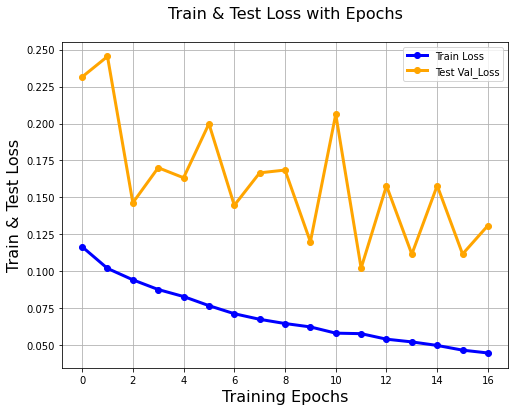

In [33]:
plt.figure(figsize = (8,6))
plt.plot(history.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(history.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,20)
plt.legend(['Train Loss', 'Test Val_Loss'], loc='upper right')
plt.title("Train & Test Loss with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Loss",fontsize =16)
plt.show()

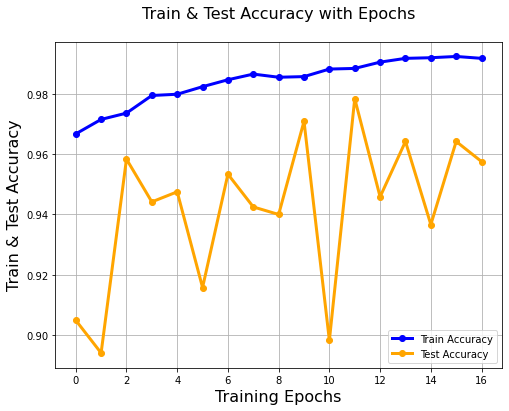

In [34]:
plt.figure(figsize = (8,6))
plt.plot(history.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.title("Train & Test Accuracy with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Accuracy",fontsize =16)
plt.show()
     

In [35]:
prediction_NN = cnn_model.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = le.inverse_transform(prediction_NN)

38/38 [==============================] - 7s 170ms/step


In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

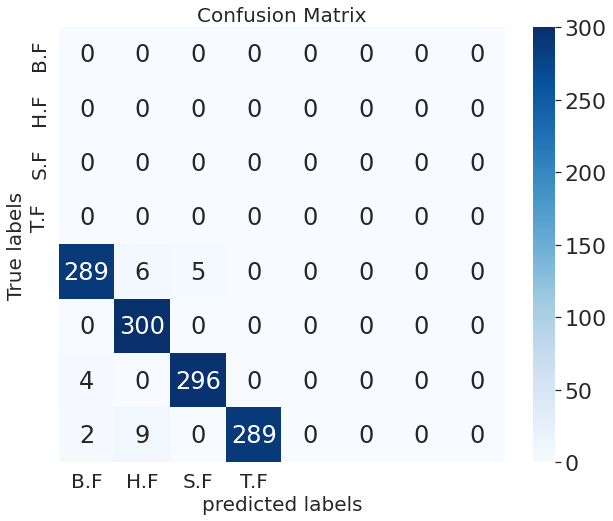

In [39]:
import seaborn as sns
cm = confusion_matrix(test_labels, prediction_NN)

plt.figure(figsize=(10,8))
ax = plt.subplot()
sns.set(font_scale = 2.0)
sns.heatmap(cm,annot = True,fmt ='g',cmap = "Blues",ax=ax);

ax.set_xlabel('predicted labels',fontsize = 20);
ax.set_ylabel('True labels',fontsize = 20);
ax.set_title('Confusion Matrix',fontsize = 20);
#ax.xaxis.set_ticklabels(['Barbel Fish','Hilsha Fish','SSH. Fish','Tilepia Fish'],fontsize = 20);
#ax.yaxis.set_ticklabels(['Barbel Fish','Hilsha Fish','SSH. Fish','Tilepia Fish'],fontsize = 20);
ax.xaxis.set_ticklabels(['B.F','H.F','S.F','T.F'],fontsize = 20);
ax.yaxis.set_ticklabels(['B.F','H.F','S.F','T.F'],minor=False,fontsize = 20);

[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [289   6   5   0   0   0   0   0]
 [  0 300   0   0   0   0   0   0]
 [  4   0 296   0   0   0   0   0]
 [  2   9   0 289   0   0   0   0]]


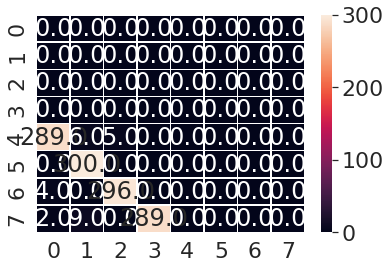

In [47]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)
sns.heatmap(cm, annot=True,
            fmt=".1f",                               
            linewidths=0.4, 
            linecolor='white')

1/1 [==============================] - 0s 28ms/step
The prediction for this image is:  ['/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training New/Tilapia_Fish']
The actual label for this image is:  /content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Tilapia_Fish


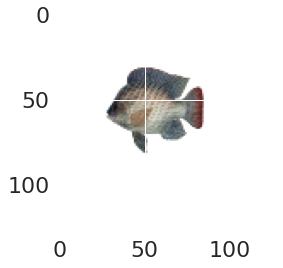

In [48]:
n=119
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
prediction = np.argmax(cnn_model.predict(input_img))  #argmax to convert categorical back to original
prediction = le.inverse_transform([prediction])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction)
print("The actual label for this image is: ", test_labels[n])

In [49]:

f1_score(test_labels, prediction_NN,average = 'macro')

0.0

In [50]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Barbel_Fish/Barbel_Fish_004.jpg', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = cnn_model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 99ms/step
[[0. 1. 0. 0.]]
[1, 0, 2, 3]
Hilsha_Fish : 100.0 %
Barbel_Fish : 0.0 %
Spotted_Snakehead_Fish : 0.0 %
Tilapia_Fish : 0.0 %
